<a href="https://colab.research.google.com/github/HwayoungYoon/opendata_intern_2022/blob/main/%EC%97%AC%EC%A3%BC%EC%8B%9C_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%98%84%ED%99%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 설정

In [2]:
# 한글 깨짐 해결을 위한 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (4,244 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [4]:
# colab과 구글 드라이버 연동
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.3 MB/s 
     |████████████████████████████████| 139 kB 65.2 MB/s 
     |████████████████████████████████| 358 kB 49.4 MB/s 
     |████████████████████████████████| 4.1 MB 51.0 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 https://

In [5]:
# library import
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.keys import Keys
from urllib.request import urlopen
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import time
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# 한글폰트 전역 설정
plt.rcParams["font.family"] = 'NanumBarunGothic'

# 크롤링

In [ ]:
# 크롤링을 위한 옵션 설정
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver', options=chrome_options)

In [ ]:
url = 'https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=FILE&keyword=%EC%97%AC%EC%A3%BC%EC%8B%9C&detailKeyword=&publicDataPk=&recmSe=N&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=&sort=_score&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=1&perPage=100&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode='
driver.get(url)

In [ ]:
# class로 지정되어 있는 데이터, 설명, 분류 등 가져오기
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')
title = soup.find_all(class_="title")
desc = soup.find_all(class_="ellipsis publicDataDesc")
labelset = soup.find_all(class_="labelset brown")
data = soup.find_all(class_="data")

# 크롤링 결과에서 텍스트를 추출해 리스트에 추가
titles = []
descs = []
labelsets = []
datas = []
for n in title:
    titles.append(n.get_text())
for m in desc:
    descs.append(m.get_text())
for r in labelset:
    labelsets.append(r.get_text())
for s in data:
    datas.append(s.get_text())

In [ ]:
# datas 중 주기성 데이터를 가지는 경우의 값 제거
del datas[20]
del datas[29-1]
del datas[58-2]
del datas[67-3]
del datas[88-4]
del datas[129-5]
del datas[190-6]
del datas[215-7]
del datas[220-8]

In [ ]:
# datas에 제공기관, 수정일, 조회수, 다운로드가 모두 포함되어 있으므로 4개의 열로 분리된 dataframe 생성
nums = pd.DataFrame()
for i in np.arange(0, len(datas), 4):
  df = pd.DataFrame(datas[i:i+4]).T
  nums = pd.concat([nums, df], ignore_index=True)

In [ ]:
# 필요없는 값을 제거하고 dataframe으로 변경
titles = pd.DataFrame(titles[7:70])
descs = pd.DataFrame(descs)
labelsets = pd.DataFrame(labelsets)

In [ ]:
# 앞서 생성한 dataframe을 병합하고 컬럼명 지정
yeoju = pd.concat([titles, descs, labelsets, nums], axis=1)
yeoju.columns = ['데이터','설명','분류','제공기관','수정일','조회수','다운로드']

In [ ]:
# <데이터>, <설명>, <제공기관>, <조회수>에 포함된 필요없는 문자 \n, \t 제거
yeoju = yeoju.astype('str')
yeoju['데이터'] = yeoju['데이터'].str.replace('\n','')
yeoju['데이터'] = yeoju['데이터'].str.replace('\t','')
yeoju['설명'] = yeoju['설명'].str.replace('\n','')
yeoju['설명'] = yeoju['설명'].str.replace('\t','')
yeoju['제공기관'] = yeoju['제공기관'].str.replace('\n','')
yeoju['제공기관'] = yeoju['제공기관'].str.replace('\t','')
yeoju['조회수'] = yeoju['조회수'].str.replace('\n','')
yeoju['조회수'] = yeoju['조회수'].str.replace('\t','')

In [ ]:
# 필요없는 컬럼 <수정일>, 여주시와 관련 없는 마지막 2개 행 제거
yeoju = yeoju.drop('수정일', axis=1)
yeoju = yeoju.drop([61,62])

In [ ]:
# 대부분의 확장자가 CSV, JSON+XML 이므로 기본값으로 CSV, JSON+XML 를 가지는 컬럼 <확장자> 생성
# XLS, XLSX 확장자를 가지는 경우만 따로 값 지정
yeoju['확장자'] = 'CSV, JSON+XML'
yeoju.loc[0,'확장자'] = 'XLS'
yeoju.loc[1,'확장자'] = 'XLS'
yeoju.loc[14,'확장자'] = 'XLSX'
yeoju.loc[27,'확장자'] = 'XLS'

In [ ]:
# <조회수>, <다운로드> 컬럼 타입을 int로 변경
yeoju = yeoju.astype({'조회수':'int'})
yeoju = yeoju.astype({'다운로드':'int'})

In [ ]:
# 데이터 확인
yeoju

,데이터,설명,분류,제공기관,조회수,다운로드,확장자
0,경기도 여주시_주민등록 인구통계,"여주시 주민등록 인구 현황 자료 데이터 입니다. 주요제공항목으로는 읍면동별, 연령별...",공공행정,경기도 여주시,2328,8,XLS
1,경기도 여주시_기본통계 및 통계연보,"여주시 통계연보 데이터입니다.통계연보는 매년 1회 발행되며, 기준일은 전전년도 12...",공공행정,경기도 여주시,2075,23,XLS
2,경기도 여주시_장사시설,"경기도 여주시 장사시설 공공데이터입니다. 장사시설명, 운영구분, 시설구분, 소재지도...",사회복지,경기도 여주시,591,63,"CSV, JSON+XML"
3,경기도 여주시_경로당,"경기도 여주시 경로당 공공데이터입니다. 경로당명, 읍면동명, 행정리통, 소재지도로명...",사회복지,경기도 여주시,449,58,"CSV, JSON+XML"
4,경기도 여주시_공장등록,"여주시 관내 공장등록에 대한 현황 데이터를 제공합니다. 제공하는 항목으로는 회사명,...",산업고용,경기도 여주시,2592,935,"CSV, JSON+XML"
...,...,...,...,...,...,...,...
56,경기도 여주시_음식물류폐기물다량배출사업장현황,경기도 여주시의 음식물류 폐기물 다량배출 사업장 현황 데이터입니다.,환경기상,경기도 여주시,45,14,"CSV, JSON+XML"
57,경기도_여주시_토양 오염도검사 및 누출검사 대상현황,경기도 여주시 관내 사업장 중 토양 오염도검사 및 누출검사 대상현황 정보입니다. 사...,환경기상,경기도 여주시,1642,469,"CSV, JSON+XML"
58,경기도 여주시_화물자동차운송주선사업허가업체현황,"경기도 여주시의 화물자동차 운송주선사업 허가업체 현황 데이터입니다. 인허가일자, 인...",교통물류,경기도 여주시,41,12,"CSV, JSON+XML"
59,경기도 여주시_실내공기질관리법적용대상다중이용시설현황,경기도 여주시의 실내공기질관리법 적용대상 다중이용시설 현황 데이터입니다.,환경기상,경기도 여주시,49,18,"CSV, JSON+XML"


# 데이터 저장

In [ ]:
# 구글 드라이브 접근 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# yeoju 데이터 저장
yeoju.to_csv('/content/drive/My Drive/yeoju.csv', index=False)

# 데이터 불러오기

In [2]:
# 구글 드라이브 접근 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# yeoju 데이터 불러오기
yeoju = pd.read_csv('/content/drive/My Drive/yeoju.csv')
yeoju.head()

,데이터,설명,분류,제공기관,조회수,다운로드,확장자
0,경기도 여주시_주민등록 인구통계,"여주시 주민등록 인구 현황 자료 데이터 입니다. 주요제공항목으로는 읍면동별, 연령별...",공공행정,경기도 여주시,2328,8,XLS
1,경기도 여주시_기본통계 및 통계연보,"여주시 통계연보 데이터입니다.통계연보는 매년 1회 발행되며, 기준일은 전전년도 12...",공공행정,경기도 여주시,2075,23,XLS
2,경기도 여주시_장사시설,"경기도 여주시 장사시설 공공데이터입니다. 장사시설명, 운영구분, 시설구분, 소재지도...",사회복지,경기도 여주시,591,63,"CSV, JSON+XML"
3,경기도 여주시_경로당,"경기도 여주시 경로당 공공데이터입니다. 경로당명, 읍면동명, 행정리통, 소재지도로명...",사회복지,경기도 여주시,449,58,"CSV, JSON+XML"
4,경기도 여주시_공장등록,"여주시 관내 공장등록에 대한 현황 데이터를 제공합니다. 제공하는 항목으로는 회사명,...",산업고용,경기도 여주시,2592,935,"CSV, JSON+XML"


# EDA (2022.07.28.목 기준)

In [19]:
# yeoju 데이터에 대한 기초통계 정보 확인
yeoju.describe(include='all')

,데이터,설명,분류,제공기관,조회수,다운로드,확장자
count,61,61,61,61,61.000000,61.000000,61
unique,61,61,12,2,NaN,NaN,3
top,경기도 여주시_주민등록 인구통계,"여주시 주민등록 인구 현황 자료 데이터 입니다. 주요제공항목으로는 읍면동별, 연령별...",공공행정,경기도 여주시,NaN,NaN,"CSV, JSON+XML"
freq,1,1,10,60,NaN,NaN,57
mean,NaN,NaN,NaN,NaN,759.819672,149.098361,NaN
std,NaN,NaN,NaN,NaN,735.490959,193.006019,NaN
min,NaN,NaN,NaN,NaN,22.000000,2.000000,NaN
25%,NaN,NaN,NaN,NaN,52.000000,16.000000,NaN
50%,NaN,NaN,NaN,NaN,506.000000,58.000000,NaN
75%,NaN,NaN,NaN,NaN,1486.000000,231.000000,NaN


In [16]:
# <제공기관> 종류 확인
yeoju['제공기관'].value_counts()

경기도 여주시     60
여주도시관리공단     1
Name: 제공기관, dtype: int64

## 조회수

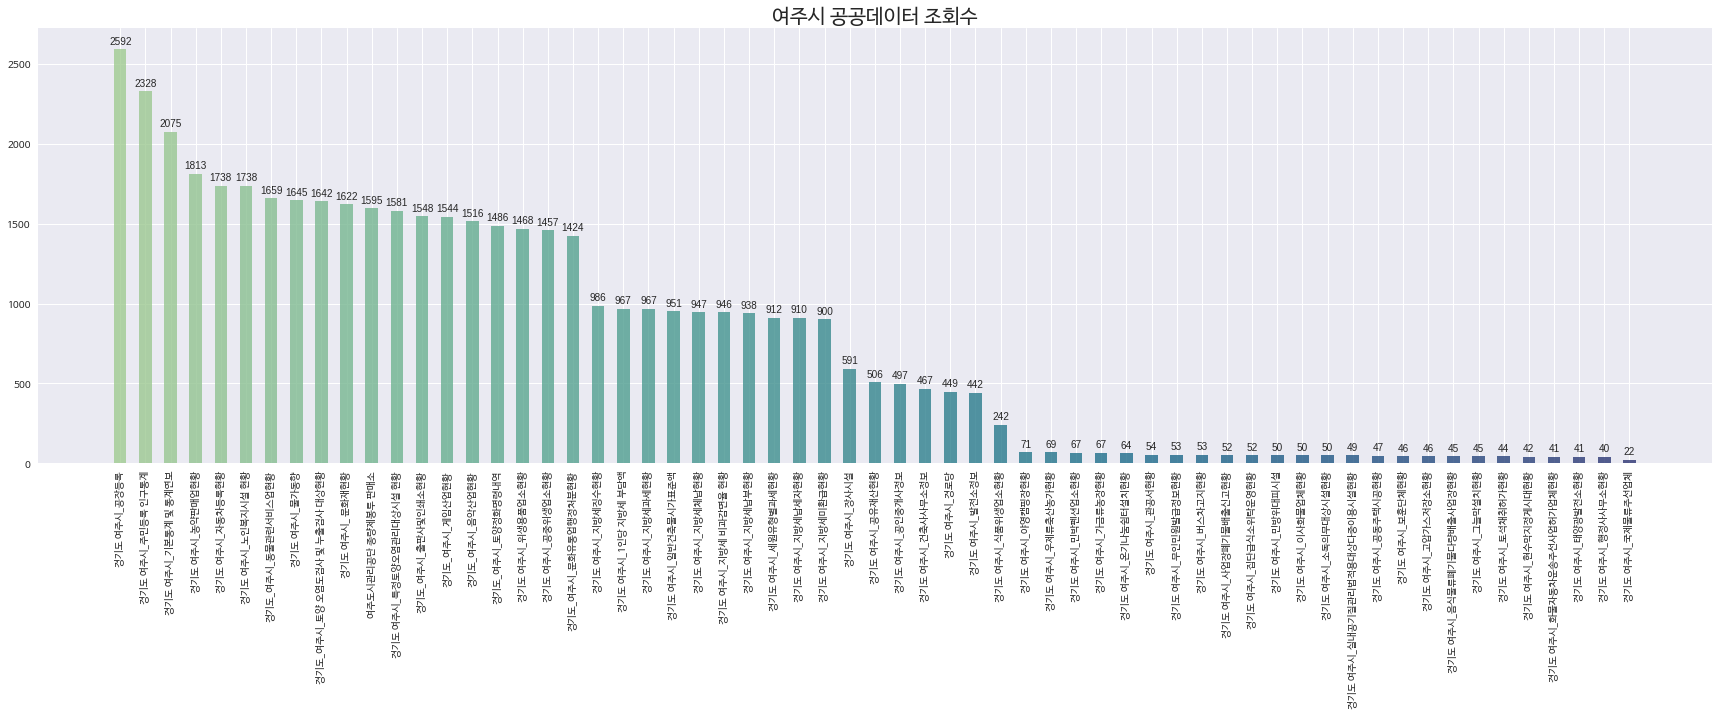

In [40]:
# 조회수가 높은 순서대로 정렬된 그래프
plt.rcParams["font.family"] = 'NanumBarunGothic'

df = yeoju.sort_values('조회수', ascending = False).reset_index(drop=True)
x = df['데이터']
y = df['조회수']

fig, ax = plt.subplots(figsize=(30,8))
colors = sns.color_palette('crest',len(x))
plt.style.use('seaborn')
plt.xticks(rotation=90)
plt.title('여주시 공공데이터 조회수', fontsize=20)
ax.bar(x, y, color=colors, alpha=0.8, width=0.5)

for i, v in enumerate(x):
    plt.text(v, y[i]+20, y[i], horizontalalignment='center', verticalalignment='bottom')

plt.show()

In [21]:
# 조회수가 2000건 이상, 100건 이하인 데이터 개수 출력
print(len(yeoju[yeoju['조회수'] >= 2000]))
print(len(yeoju[yeoju['조회수'] <= 100]))

3
25


## 다운로드

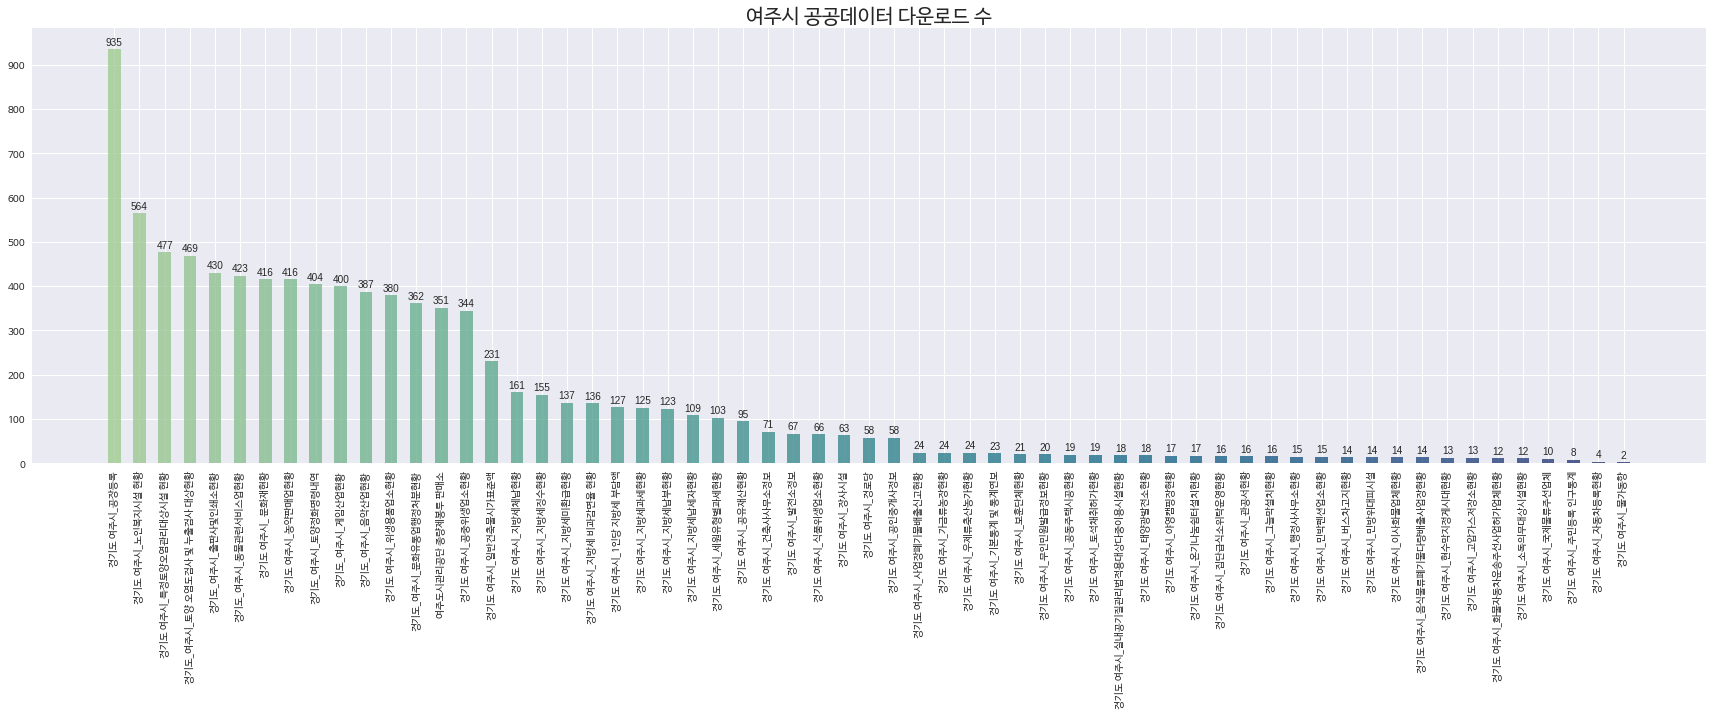

In [41]:
# 다운로드수가 높은 순서대로 정렬된 그래프
plt.rcParams["font.family"] = 'NanumBarunGothic'

df = yeoju.sort_values('다운로드', ascending = False).reset_index(drop=True)
x = df['데이터']
y = df['다운로드']

fig, ax = plt.subplots(figsize=(30,8))
colors = sns.color_palette('crest',len(x))
plt.style.use('seaborn')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1000, 100))
plt.title('여주시 공공데이터 다운로드 수', fontsize=20)
ax.bar(x, y, color=colors, alpha=0.8, width=0.5)

for i, v in enumerate(x):
    plt.text(v, y[i]+5, y[i], horizontalalignment='center', verticalalignment='bottom')

plt.show()

In [22]:
# 다운로드수가 500건 이상, 50건 이하인 데이터 개수 출력
print(len(yeoju[yeoju['다운로드'] >= 500]))
print(len(yeoju[yeoju['다운로드'] <= 50]))

2
29


## 조회수 대비 다운로드

In [24]:
# 조회수 대비 다운로드수를 알아보기 위해 <다운로드>를 <조회수>로 나눈 <다운로드/조회수> 컬럼 생성
yeoju['다운로드/조회수'] = yeoju['다운로드']/yeoju['조회수']

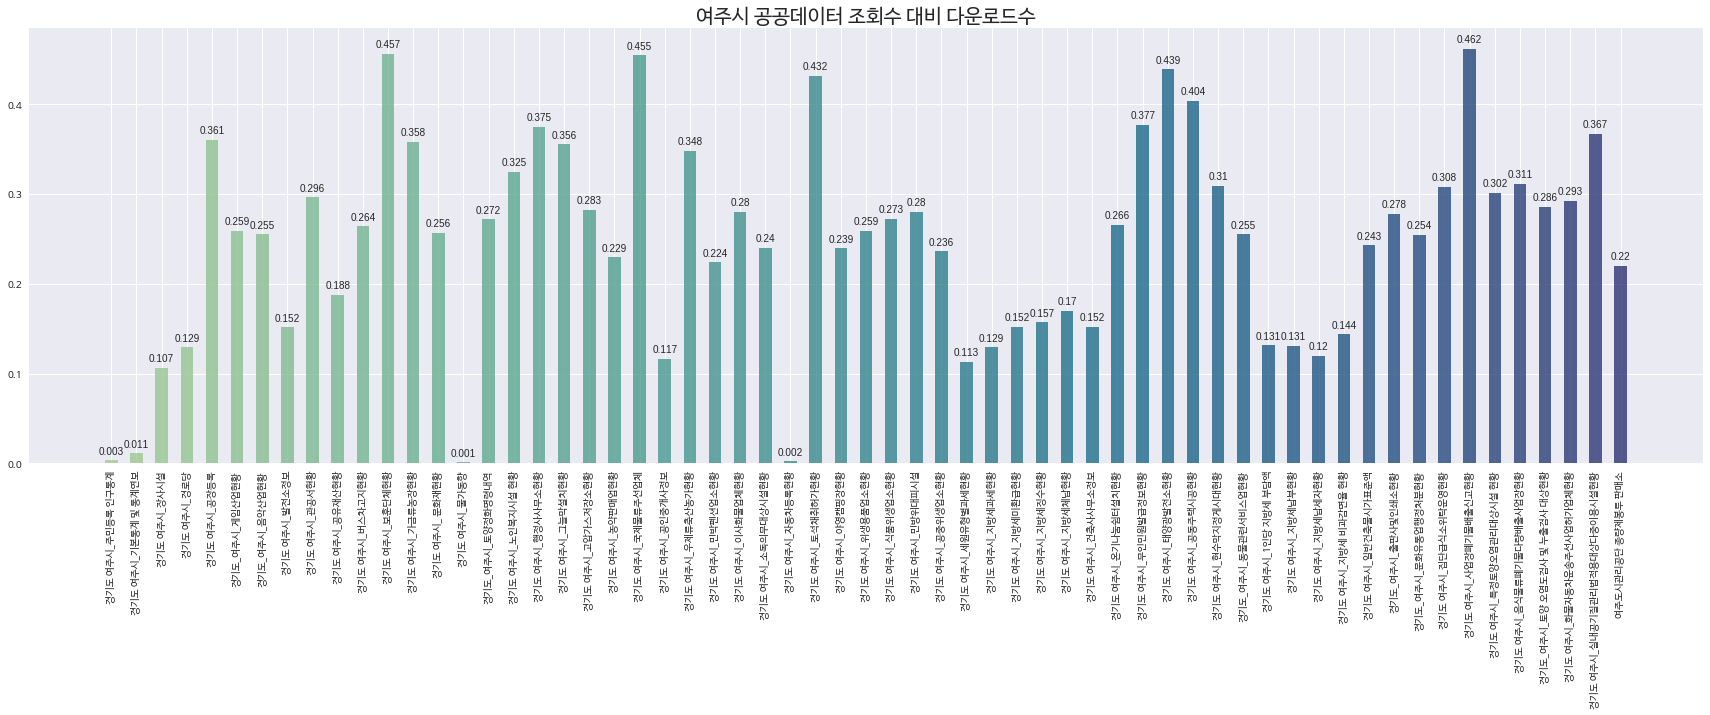

In [42]:
# 조회수 대비 다운로드수 그래프
plt.rcParams["font.family"] = 'NanumBarunGothic'

x = yeoju['데이터']
y = yeoju['다운로드/조회수']

fig, ax = plt.subplots(figsize=(30,8))
colors = sns.color_palette('crest',len(x))
plt.style.use('seaborn')
plt.xticks(rotation=90)
plt.title('여주시 공공데이터 조회수 대비 다운로드수', fontsize=20)
ax.bar(x, y, color=colors, alpha=0.8, width=0.5)

for i, v in enumerate(x):
    plt.text(v, y[i]+0.005, round(y[i],3), horizontalalignment='center', verticalalignment='bottom')

plt.show()

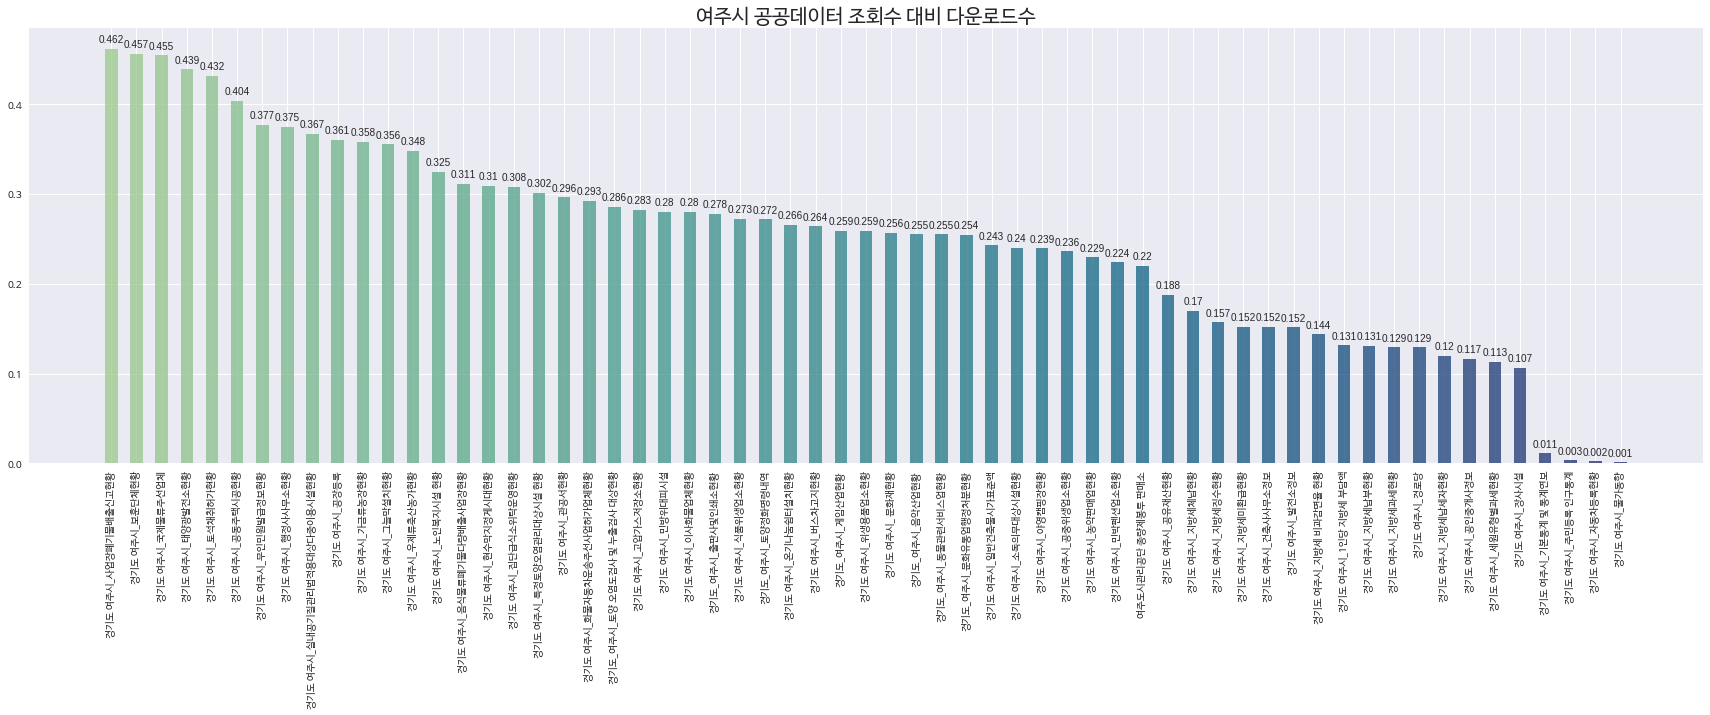

In [43]:
# 조회수 대비 다운로드수가 높은 순서대로 정렬된 그래프
plt.rcParams["font.family"] = 'NanumBarunGothic'

df = yeoju.sort_values('다운로드/조회수', ascending = False).reset_index(drop=True)
x = df['데이터']
y = df['다운로드/조회수']

fig, ax = plt.subplots(figsize=(30,8))
colors = sns.color_palette('crest',len(x))
plt.style.use('seaborn')
plt.xticks(rotation=90)
plt.title('여주시 공공데이터 조회수 대비 다운로드수', fontsize=20)
ax.bar(x, y, color=colors, alpha=0.8, width=0.5)

for i, v in enumerate(x):
    plt.text(v, y[i]+0.005, round(y[i],3), horizontalalignment='center', verticalalignment='bottom')

plt.show()

## 분류체계별 데이터 개수

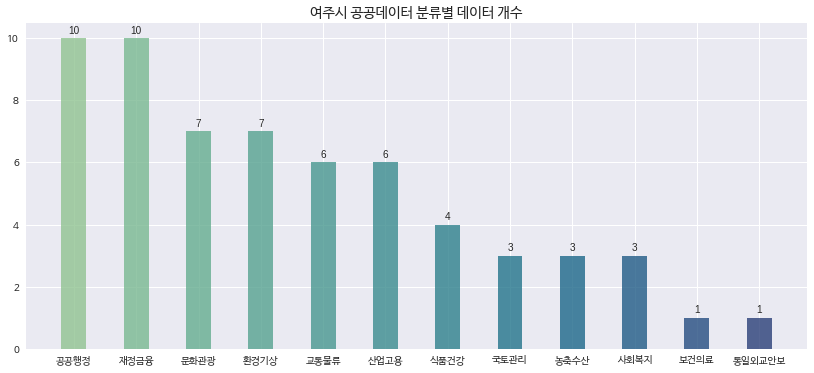

In [45]:
# 분류별 데이터 개수가 높은 순서대로 정렬된 그래프
plt.rcParams["font.family"] = 'NanumBarunGothic'

df = yeoju.groupby('분류').size().reset_index().sort_values(0, ascending = False).reset_index(drop=True)
x = df['분류']
y = df[0]

fig, ax = plt.subplots(figsize=(14,6))
colors = sns.color_palette('crest',len(x))
plt.style.use('seaborn')
plt.title('여주시 공공데이터 분류별 데이터 개수', fontsize=14)
ax.bar(x, y, color=colors, alpha=0.8, width=0.4)

for i, v in enumerate(x):
    plt.text(v, y[i]+0.1, y[i], horizontalalignment='center', verticalalignment='bottom')

plt.show()

## 확장자별 데이터 개수

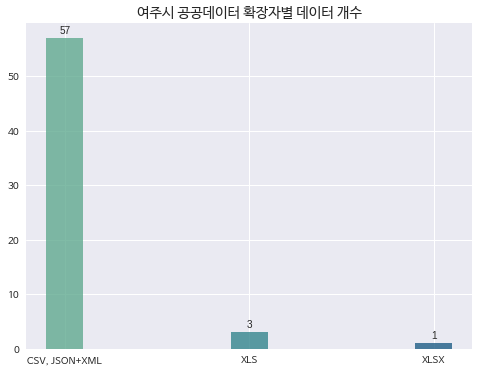

In [48]:
# 확장자별 데이터 개수가 높은 순서대로 정렬된 그래프
plt.rcParams["font.family"] = 'NanumBarunGothic'

x = yeoju.groupby('확장자').size().index.tolist()
y = yeoju.groupby('확장자').size()

fig, ax = plt.subplots(figsize=(8,6))
colors = sns.color_palette('crest',len(x))
plt.style.use('seaborn')
plt.title('여주시 공공데이터 확장자별 데이터 개수', fontsize=14)
ax.bar(x, y, color=colors, alpha=0.8, width=0.2)

for i, v in enumerate(x):
    plt.text(v, y[i]+0.5, y[i], horizontalalignment='center', verticalalignment='bottom')

plt.show()

## 조회수, 다운로드

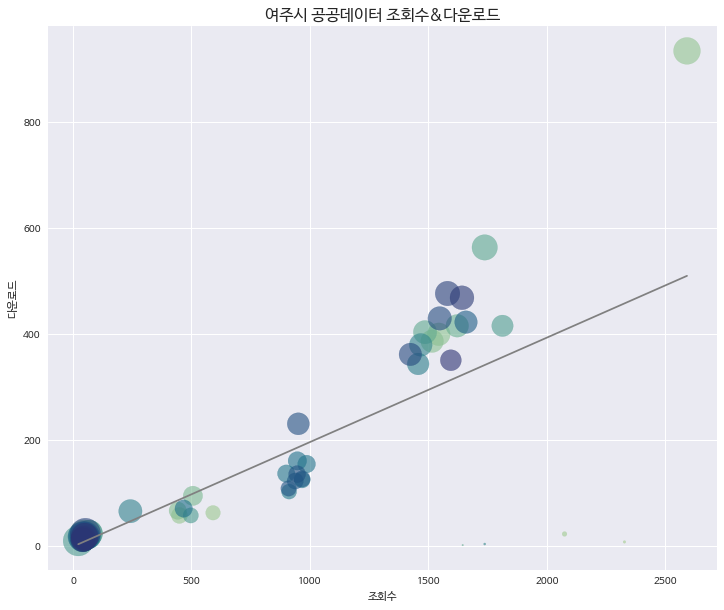

In [50]:
# 회귀직선을 포함하는 조회수와 다운로드수의 산점도
# 각 점의 크기는 조회수 대비 다운로드수에 비례함
plt.rcParams["font.family"] = 'NanumBarunGothic'

x = yeoju['조회수']
y = yeoju['다운로드']
area = yeoju['다운로드/조회수']*2000

fit_line = np.polyfit(x, y, 1)
x_minmax = np.array([min(x), max(x)])
fit_y = x_minmax * fit_line[0] + fit_line[1]

fig, ax = plt.subplots(figsize=(12,10))
plt.style.use('seaborn')
plt.title('여주시 공공데이터 조회수&다운로드', fontsize=16)
plt.xlabel('조회수')
plt.ylabel('다운로드')
ax.scatter(x, y, s=area, c=range(len(x)), alpha=0.6, cmap='crest')
ax.plot(x_minmax, fit_y, color='gray')

plt.show()

In [27]:
# 조회수, 다운로드수, 조회수 대비 다운로드수가 각각 적은 순서대로 정렬해 비교하기 위한 dataframe 생성
yeoju_sort = pd.DataFrame()
yeoju_sort['조회수'] = yeoju.sort_values('조회수')['데이터'].reset_index(drop=True)
yeoju_sort['다운로드'] = yeoju.sort_values('다운로드')['데이터'].reset_index(drop=True)
yeoju_sort['다운로드/조회수'] = yeoju.sort_values('다운로드/조회수')['데이터'].reset_index(drop=True)
yeoju_sort

,조회수,다운로드,다운로드/조회수
0,경기도 여주시_국제물류주선업체,경기도 여주시_물가동향,경기도 여주시_물가동향
1,경기도 여주시_행정사사무소현황,경기도 여주시_자동차등록현황,경기도 여주시_자동차등록현황
2,경기도 여주시_태양광발전소현황,경기도 여주시_주민등록 인구통계,경기도 여주시_주민등록 인구통계
3,경기도 여주시_화물자동차운송주선사업허가업체현황,경기도 여주시_국제물류주선업체,경기도 여주시_기본통계 및 통계연보
4,경기도 여주시_현수막지정게시대현황,경기도 여주시_소독의무대상시설현황,경기도 여주시_장사시설
...,...,...,...
56,경기도 여주시_노인복지시설 현황,경기도_여주시_출판사및인쇄소현황,경기도 여주시_토석채취허가현황
57,경기도 여주시_농약판매업현황,경기도_여주시_토양 오염도검사 및 누출검사 대상현황,경기도 여주시_태양광발전소현황
58,경기도 여주시_기본통계 및 통계연보,경기도 여주시_특정토양오염관리대상시설 현황,경기도 여주시_국제물류주선업체
59,경기도 여주시_주민등록 인구통계,경기도 여주시_노인복지시설 현황,경기도 여주시_보훈단체현황


In [28]:
# 조회수와 다운로드수의 순위가 같은 데이터 확인
yeoju_sort[yeoju_sort['조회수'] == yeoju_sort['다운로드']]

,조회수,다운로드,다운로드/조회수
29,경기도 여주시_공인중개사정보,경기도 여주시_공인중개사정보,경기도 여주시_ 문화재현황
31,경기도 여주시_장사시설,경기도 여주시_장사시설,경기도_여주시_게임산업현황
60,경기도 여주시_공장등록,경기도 여주시_공장등록,경기도 여주시_사업장폐기물배출신고현황


## 분류별 평균 조회수

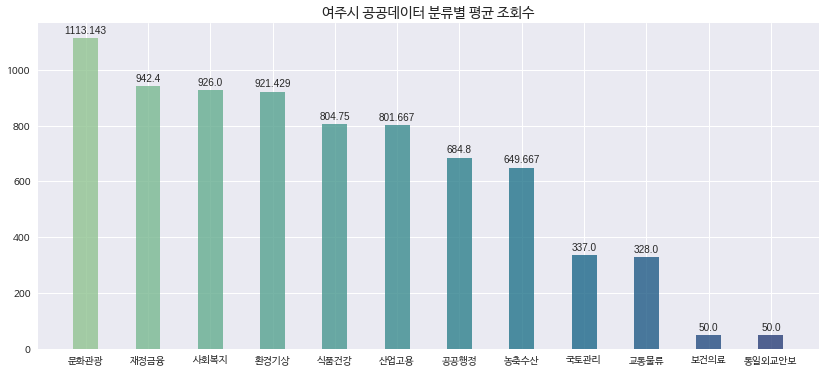

In [51]:
# 분류별 평균 조회수가 높은 순서대로 정렬된 그래프
plt.rcParams["font.family"] = 'NanumBarunGothic'

df = yeoju.groupby('분류').mean()['조회수'].reset_index().sort_values('조회수', ascending = False).reset_index(drop=True)
x = df['분류']
y = df['조회수']

fig, ax = plt.subplots(figsize=(14,6))
colors = sns.color_palette('crest',len(x))
plt.style.use('seaborn')
plt.title('여주시 공공데이터 분류별 평균 조회수', fontsize=14)
ax.bar(x, y, color=colors, alpha=0.8, width=0.4)

for i, v in enumerate(x):
    plt.text(v, y[i]+10, round(y[i],3), horizontalalignment='center', verticalalignment='bottom')

plt.show()

## 분류별 평균 다운로드수

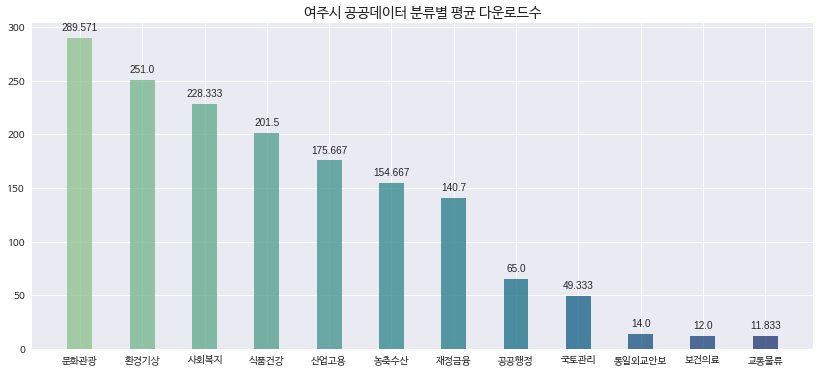

In [52]:
# 분류별 평균 다운로드수가 높은 순서대로 정렬된 그래프
plt.rcParams["font.family"] = 'NanumBarunGothic'

df = yeoju.groupby('분류').mean()['다운로드'].reset_index().sort_values('다운로드', ascending = False).reset_index(drop=True)
x = df['분류']
y = df['다운로드']

fig, ax = plt.subplots(figsize=(14,6))
colors = sns.color_palette('crest',len(x))
plt.style.use('seaborn')
plt.title('여주시 공공데이터 분류별 평균 다운로드수', fontsize=14)
ax.bar(x, y, color=colors, alpha=0.8, width=0.4)

for i, v in enumerate(x):
    plt.text(v, y[i]+5, round(y[i],3), horizontalalignment='center', verticalalignment='bottom')

plt.show()

## 분류별 조회수 대비 다운로드 순위

In [29]:
# 분류별 조회수 대비 다운로드수의 계산을 위한 점수 부여
# 조회수 대비 다운로드수가 높을수록 높은 점수를 부여해 <score> 컬럼 추가
yeoju_sort['데이터'] = yeoju_sort['다운로드/조회수']
yeoju_sort = pd.merge(yeoju_sort, yeoju[['데이터','분류']], on = '데이터')
yeoju_sort = yeoju_sort.drop(['데이터'], axis=1)
yeoju_sort['score'] = range(1, 1+len(yeoju_sort))
yeoju_sort

,조회수,다운로드,다운로드/조회수,분류,score
0,경기도 여주시_국제물류주선업체,경기도 여주시_물가동향,경기도 여주시_물가동향,산업고용,1
1,경기도 여주시_행정사사무소현황,경기도 여주시_자동차등록현황,경기도 여주시_자동차등록현황,교통물류,2
2,경기도 여주시_태양광발전소현황,경기도 여주시_주민등록 인구통계,경기도 여주시_주민등록 인구통계,공공행정,3
3,경기도 여주시_화물자동차운송주선사업허가업체현황,경기도 여주시_국제물류주선업체,경기도 여주시_기본통계 및 통계연보,공공행정,4
4,경기도 여주시_현수막지정게시대현황,경기도 여주시_소독의무대상시설현황,경기도 여주시_장사시설,사회복지,5
...,...,...,...,...,...
56,경기도 여주시_노인복지시설 현황,경기도_여주시_출판사및인쇄소현황,경기도 여주시_토석채취허가현황,산업고용,57
57,경기도 여주시_농약판매업현황,경기도_여주시_토양 오염도검사 및 누출검사 대상현황,경기도 여주시_태양광발전소현황,산업고용,58
58,경기도 여주시_기본통계 및 통계연보,경기도 여주시_특정토양오염관리대상시설 현황,경기도 여주시_국제물류주선업체,교통물류,59
59,경기도 여주시_주민등록 인구통계,경기도 여주시_노인복지시설 현황,경기도 여주시_보훈단체현황,공공행정,60


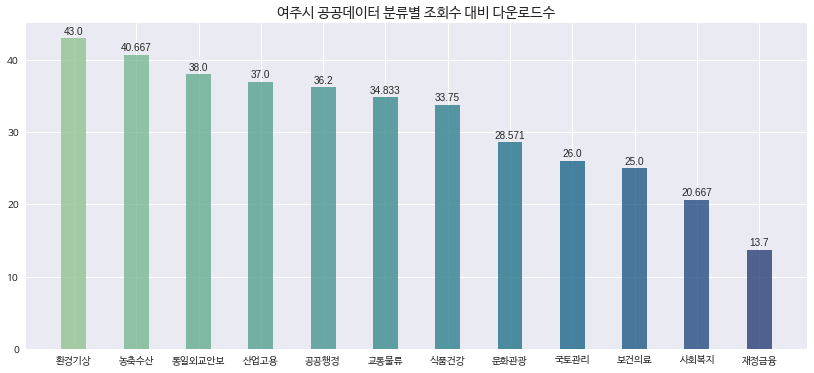

In [53]:
# 분류별 조회수 대비 다운로드수가 높은 순서대로 정렬된 그래프
plt.rcParams["font.family"] = 'NanumBarunGothic'

df = yeoju_sort.groupby('분류').mean().reset_index().sort_values('score', ascending = False).reset_index(drop=True)
x = df['분류']
y = df['score']

fig, ax = plt.subplots(figsize=(14,6))
colors = sns.color_palette('crest',len(x))
plt.style.use('seaborn')
plt.title('여주시 공공데이터 분류별 조회수 대비 다운로드수', fontsize=14)
ax.bar(x, y, color=colors, alpha=0.8, width=0.4)

for i, v in enumerate(x):
    plt.text(v, y[i]+0.3, round(y[i],3), horizontalalignment='center', verticalalignment='bottom')

plt.show()